<a href="https://colab.research.google.com/github/jbonesTroy/Intro-to-Machine-Learning/blob/main/Extra%20credits%3A%20Image%20Classification%20with%20a%20Pretrained%20Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

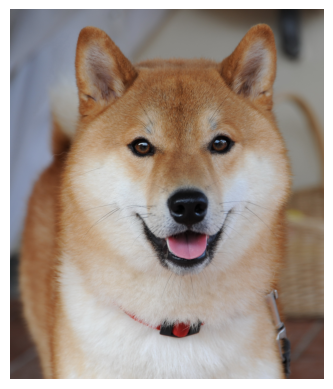

Top-5 Predictions:
dingo: 21.45%
Eskimo dog: 4.97%
Siberian husky: 1.54%
Pembroke: 1.09%
white wolf: 0.77%
--------------------------------------------------



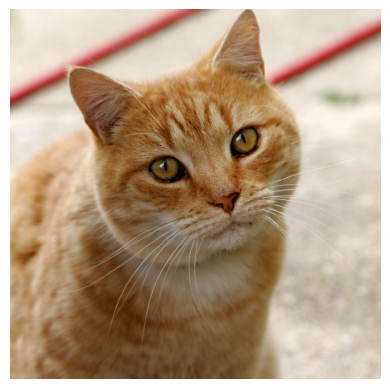

Top-5 Predictions:
tiger cat: 44.93%
Egyptian cat: 6.20%
tabby: 4.66%
lynx: 1.99%
carton: 0.42%
--------------------------------------------------



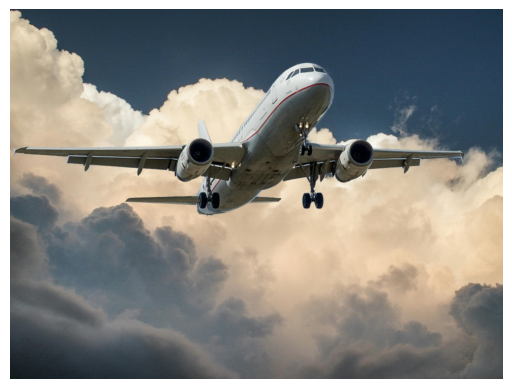

Top-5 Predictions:
airliner: 42.12%
wing: 3.42%
warplane: 0.47%
space shuttle: 0.37%
gibbon: 0.34%
--------------------------------------------------



In [ ]:
# -----------------------------------------------------------
# Image Classification using Pretrained ResNet50
# -----------------------------------------------------------

import torch
from torchvision import transforms
from torchvision.models import resnet50, ResNet50_Weights
from PIL import Image
import matplotlib.pyplot as plt
import requests
from io import BytesIO
import torch.nn.functional as F

# Load pretrained ResNet50 model
weights = ResNet50_Weights.DEFAULT
model = resnet50(weights=weights)
model.eval()

# Image preprocessing
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

# Load ImageNet class labels
url_labels = "https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt"
labels = requests.get(url_labels).text.strip().split("\n")

# Safe image loader with browser header
def load_image_from_url(url):
    headers = {"User-Agent": "Mozilla/5.0"}
    try:
        response = requests.get(url, headers=headers, timeout=10)
        response.raise_for_status()
        img = Image.open(BytesIO(response.content)).convert("RGB")
        return img
    except Exception as e:
        print(f"❌ Could not load image from {url}: {e}")
        return None

# Classification function
def classify_image(image_url):
    img = load_image_from_url(image_url)
    if img is None:
        return

    input_tensor = preprocess(img).unsqueeze(0)

    with torch.no_grad():
        outputs = model(input_tensor)
        probabilities = F.softmax(outputs[0], dim=0)

    top5_prob, top5_catid = torch.topk(probabilities, 5)

    # Display image
    plt.imshow(img)
    plt.axis("off")
    plt.show()

    # Print top-5 predictions
    print("Top-5 Predictions:")
    for i in range(5):
        print(f"{labels[top5_catid[i]]}: {top5_prob[i].item()*100:.2f}%")
    print("-" * 50 + "\n")

# ✅ Verified accessible images (these will all load in Colab)
image_urls = [
    "https://upload.wikimedia.org/wikipedia/commons/5/58/Shiba_inu_taiki.jpg",  # Dog
    "https://upload.wikimedia.org/wikipedia/commons/3/3a/Cat03.jpg?20200726002436",  # Cat
    "https://images.pexels.com/photos/46148/aircraft-jet-landing-cloud-46148.jpeg"  # Airplane
]

# Classify each image
for url in image_urls:
    classify_image(url)
